In [2]:
import pandas as pd
import os
import glob
import re

data_dir = os.path.join(os.path.expanduser('~'),'Desktop','data')

def is_data_col(col, year=None):
    if year:
        full_year = '20'+year
        return ((str(year) in str(col)) and str(full_year) not in str(col))
    else: 
        num_alpha = [(c.isalpha() or (c=='_')) for c in col]
        return not all(num_alpha) and ('CSA' not in col)

def ingest_custom_csv(fp):
    df = pd.read_csv(fp)
    filename = os.path.basename(fp).split('.')[0]
    rename_col = lambda col_name: re.sub(r'[a-zA-Z]+',filename, col_name) if is_data_col(col_name) else col_name
    df.rename(rename_col, axis=1,inplace=True)
    return df

df = pd.concat([ingest_custom_csv(fp) for fp in glob.glob(os.path.join(data_dir,'*.csv'))],axis=1)
df

,OBJECTID,CSA2010,Percent_of_Students_that_are_Hispanic10,Percent_of_Students_that_are_Hispanic11,Percent_of_Students_that_are_Hispanic12,Percent_of_Students_that_are_Hispanic13,Percent_of_Students_that_are_Hispanic14,Percent_of_Students_that_are_Hispanic15,Percent_of_Students_that_are_Hispanic16,Percent_of_Students_that_are_Hispanic17,...,Percent_of_Students_that_are_African_American_(non-Hispanic)12,Percent_of_Students_that_are_African_American_(non-Hispanic)13,Percent_of_Students_that_are_African_American_(non-Hispanic)14,Percent_of_Students_that_are_African_American_(non-Hispanic)15,Percent_of_Students_that_are_African_American_(non-Hispanic)16,Percent_of_Students_that_are_African_American_(non-Hispanic)17,Percent_of_Students_that_are_African_American_(non-Hispanic)19,Percent_of_Students_that_are_African_American_(non-Hispanic)20,Shape__Area,Shape__Length
0,1,Allendale/Irvington/S. Hilton,0.757337,1.52,2.060000,1.860000,1.790000,1.884300,2.363600,2.891459,...,92.9700,93.360000,93.54,93.270000,92.450000,91.903915,92.406362,92.245119,6.377046e+07,38770.165571
1,2,Beechfield/Ten Hills/West Hills,0.648508,1.16,1.060000,1.530000,1.330000,2.416500,2.914000,2.565930,...,95.6400,94.470000,94.59,93.600000,93.250000,91.446900,90.517928,91.087490,4.788253e+07,37524.950533
2,3,Belair-Edison,0.290951,0.69,1.180000,1.560000,1.120000,1.637600,2.114500,2.244582,...,96.6700,96.130000,96.71,96.290000,95.520000,94.775542,94.307944,94.685598,4.495003e+07,31307.314843
3,4,Brooklyn/Curtis Bay/Hawkins Point,6.551724,8.30,9.540000,11.920000,12.380000,15.689900,18.901900,20.909477,...,58.2300,55.760000,56.85,54.590000,51.400000,50.531237,49.081953,45.123023,1.760777e+08,150987.703639
4,5,Canton,17.460320,18.97,21.110000,25.400000,23.900000,25.443800,28.160900,24.074074,...,19.1000,16.400000,20.75,18.930000,15.520000,14.814815,13.725490,12.765957,1.540854e+07,23338.611948
5,6,Cedonia/Frankford,0.948767,1.21,1.800000,1.880000,1.760000,2.026600,2.358500,2.639128,...,86.2600,86.910000,88.49,89.550000,89.910000,90.103270,90.723621,90.721003,7.154134e+07,39962.549835
6,7,Cherry Hill,0.048876,0.67,1.590000,1.970000,2.420000,2.511700,2.915500,3.807740,...,96.8700,96.380000,95.67,95.790000,95.390000,94.069913,93.654990,93.963783,2.914418e+07,22305.302067
7,8,Chinquapin Park/Belvedere,0.389484,2.02,2.660000,1.680000,1.540000,4.831500,5.543500,3.369565,...,90.4200,91.300000,91.60,87.530000,86.200000,88.586957,89.330025,87.823834,2.102259e+07,21705.411630
8,9,Claremont/Armistead,14.375490,18.57,21.610000,23.190000,25.740000,25.551800,27.479500,30.706363,...,56.2500,57.390000,54.91,56.120000,56.290000,55.107998,53.957704,52.383721,6.124377e+07,40104.415980
9,10,Clifton-Berea,0.386764,0.50,0.520000,0.540000,0.610000,1.232300,1.840900,2.998501,...,98.4300,98.380000,98.54,97.410000,96.650000,95.427286,94.935752,93.491577,2.328523e+07,24022.764621


In [3]:
df.columns.tolist()

['OBJECTID',
 'CSA2010',
 'Percent_of_Students_that_are_Hispanic10',
 'Percent_of_Students_that_are_Hispanic11',
 'Percent_of_Students_that_are_Hispanic12',
 'Percent_of_Students_that_are_Hispanic13',
 'Percent_of_Students_that_are_Hispanic14',
 'Percent_of_Students_that_are_Hispanic15',
 'Percent_of_Students_that_are_Hispanic16',
 'Percent_of_Students_that_are_Hispanic17',
 'Percent_of_Students_that_are_Hispanic19',
 'Percent_of_Students_that_are_Hispanic20',
 'Shape__Area',
 'Shape__Length',
 'OBJECTID',
 'CSA2010',
 'High_School_Completion_Rate10',
 'High_School_Completion_Rate11',
 'High_School_Completion_Rate12',
 'High_School_Completion_Rate13',
 'High_School_Completion_Rate14',
 'High_School_Completion_Rate15',
 'High_School_Completion_Rate16',
 'High_School_Completion_Rate17',
 'High_School_Completion_Rate19',
 'High_School_Completion_Rate20',
 'Shape__Area',
 'Shape__Length',
 'OBJECTID',
 'CSA2010',
 'Percent_of_1st-5th_Grade_Students_that_are_Chronically_Absent_(Missing_at_l

In [4]:
# 2-digit year seems to be trailing 2 digits of end of interval (ex. 10 below represents 2009-2010)
year = '10'
full_year = '20'+year
year_cols = [c for c in df.columns.tolist() if is_data_col(c, year)]
csa_name_list = [c for c in df.columns.tolist() if ('CSA' in str(c))]
assert((len(csa_name_list)==1) or (len(list(set(csa_name_list)))==1))
csa_name = csa_name_list[0]
df_subset = df[year_cols+[csa_name]]
df_subset = df_subset.loc[:,~df_subset.columns.duplicated()]

drop_year = lambda col_name: col_name[:-2] if (col_name != csa_name) else col_name
df_subset.rename(drop_year, axis=1,inplace=True)
df_subset

,Percent_of_Students_that_are_Hispanic,High_School_Completion_Rate,Percent_of_1st-5th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days),Percent_of_Students_that_are_African_American_(non-Hispanic),CSA2010
0,0.757337,80.34934,14.669050,94.91953,Allendale/Irvington/S. Hilton
1,0.648508,85.86957,6.445993,95.39559,Beechfield/Ten Hills/West Hills
2,0.290951,82.85714,14.027540,96.91592,Belair-Edison
3,6.551724,78.46154,19.584570,58.92241,Brooklyn/Curtis Bay/Hawkins Point
4,17.460320,75.00000,7.777778,19.57672,Canton
5,0.948767,82.11921,10.514020,91.32556,Cedonia/Frankford
6,0.048876,76.40449,14.285710,97.60508,Cherry Hill
7,0.389484,76.38889,10.498690,93.28140,Chinquapin Park/Belvedere
8,14.375490,80.32787,14.126390,58.68028,Claremont/Armistead
9,0.386764,77.69784,15.358360,98.23807,Clifton-Berea


In [5]:
df_subset.set_index(csa_name,inplace=True)

In [6]:
df_subset.columns.tolist()

['Percent_of_Students_that_are_Hispanic',
 'High_School_Completion_Rate',
 'Percent_of_1st-5th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)',
 'Percent_of_Students_that_are_African_American_(non-Hispanic)']

In [7]:
col_sort_by='Percent_of_Students_that_are_African_American_(non-Hispanic)'
df_subset.sort_values(by=f'{col_sort_by}',ascending=True,inplace=True)

In [8]:
df_subset.drop(columns='Percent_of_Students_that_are_Hispanic',inplace=True)

<AxesSubplot:title={'center':'2009-2010'}, xlabel='CSA2010'>

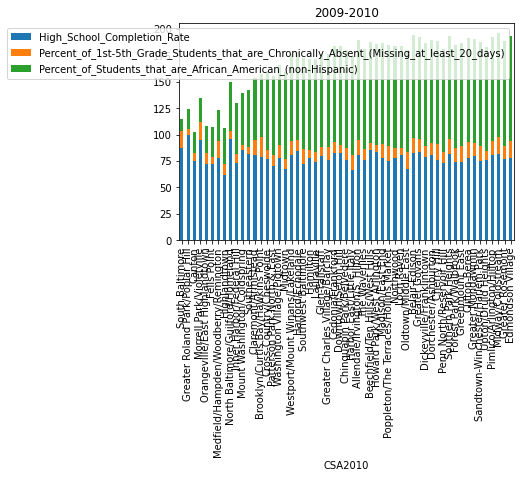

In [9]:
df_subset.plot.bar(stacked=True,title=f'20{int(year)-1:02d}-20{int(year):02d}')

In [11]:
from scipy import stats

pearson_corr_coeff, two_tailed_p_value = stats.pearsonr(df_subset['High_School_Completion_Rate'].tolist(),
                                   df_subset[col_sort_by].tolist())
pearson_corr_coeff, two_tailed_p_value

(-0.22531543204274576, 0.09813823454285296)